In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

# Q2 Part-1

### Creating Dataset

Dataset without any noise

In [2]:
df = CircleDataset(10000).get()

Dataset with Standara Normal noise

In [3]:
df_noise = CircleDataset(10000).get(add_noise=True)

Check whether dataset are equal?    

In [4]:
(df_noise == df).sum()

x               0
y               0
center_x    10000
center_y     4941
radius      10000
label        4941
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   center_x  10000 non-null  float64
 3   center_y  10000 non-null  float64
 4   radius    10000 non-null  float64
 5   label     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [6]:
df_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         10000 non-null  float64
 1   y         10000 non-null  float64
 2   center_x  10000 non-null  float64
 3   center_y  10000 non-null  float64
 4   radius    10000 non-null  float64
 5   label     10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


Checking whether the Dataset satisfies Equation of circle

In [7]:
(np.abs((df['x']-df['center_x'])**2 + (df['y']-df['center_y'])**2 - 1) > 1e-15).sum()

0

In [8]:
df.head()

,x,y,center_x,center_y,radius,label
0,0.917220,2.601619,0.0,3.0,1.0,1.0
1,-0.959715,-0.280976,0.0,0.0,1.0,0.0
2,-0.372399,-0.928073,0.0,0.0,1.0,0.0
3,0.999797,0.020127,0.0,0.0,1.0,0.0
4,0.524851,-0.851194,0.0,0.0,1.0,0.0


# Q2 Part-2


### Plotting the circle Dataset

In [9]:
def plot_circle_dataset(data, xlim, ylim, plot_decision_boundary=False, model_weights=[]):
    fig = plt.figure(dpi=150)
    axes = fig.add_axes([0,0,1,1])

    df_label0 = data[data['label'] == 0]
    df_label1 = data[data['label'] == 1]

    axes.scatter(df_label0['x'], df_label0['y'], c='r', marker='.', label='Label 0 (red)', s=5);
    axes.scatter(df_label1['x'], df_label1['y'], c='b', marker='.', label='Label 1 (blue)', s=5);

    if plot_decision_boundary:
        x = np.random.uniform(low=xlim[0],high=xlim[1],size=1000)
        y = (-model_weights[2] - model_weights[0]*x) / model_weights[1]
        axes.plot(x,y,color='k',label='Decision Boundary')
    
    axes.grid(True)
    axes.legend()
    axes.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
    axes.spines['left'].set_position(('data',0))   # set position of y spine to y=0
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xlabel('X', loc='right', fontsize=18)
    axes.set_ylabel('Y', loc='top', fontsize=18)

##### Plot of Circle Dataset without noise (with "add_noise = False")

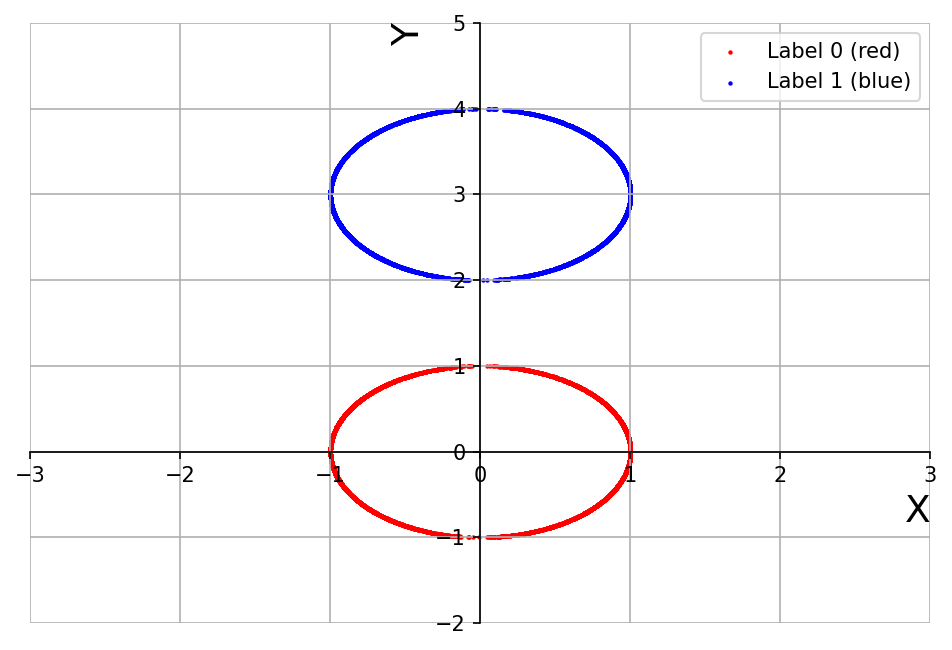

In [10]:
plot_circle_dataset(df, [-3,3], [-2,5])

##### Plot of Circle Dataset with noise (with "add_noise = True")

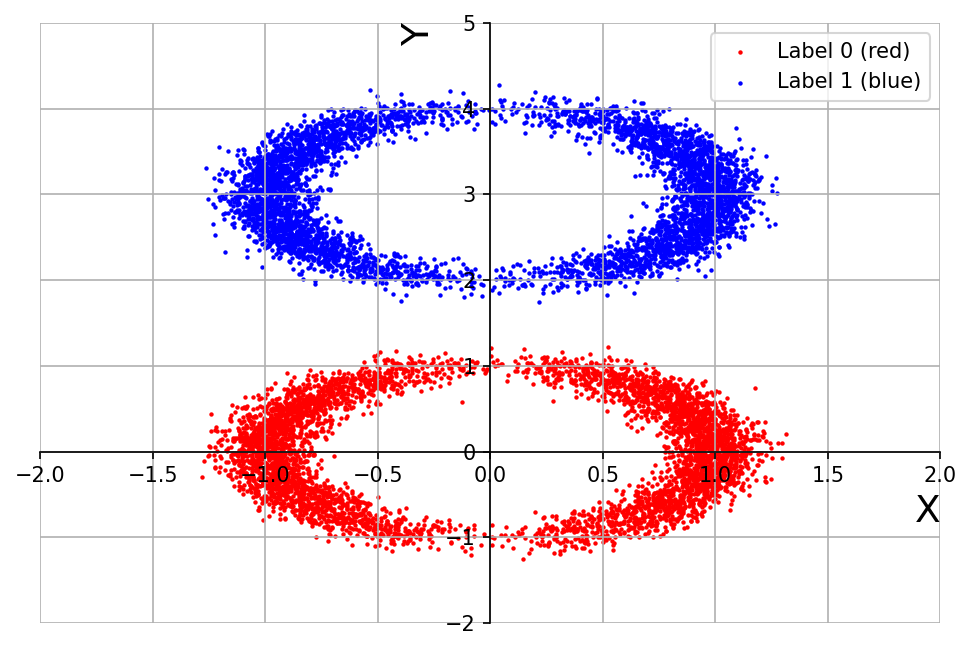

In [11]:
plot_circle_dataset(df_noise, [-2,2], [-2,5])

# Q2 Part-3

Applying Perceptron on the Dataset

In [12]:
def apply_preceptron_on_circle_data(df_set: pd.DataFrame, partition_size, with_bias=True):
    x_train, y_train, x_test, y_test = split_circle_data_into_train_test(df_set, partition_size, with_bias)

    perceptron_model = Perceptron()
    perceptron_model.fit(x_train, y_train)

    y_pred = perceptron_model.predict(x_test)

    accuracy = perceptron_model.accuracy(x_test, y_test)
    # print(perceptron_model.weights)

    print(f'Accuracy in Prediction of Perceptron Learning Algorithm (on 20% Testing Set):', accuracy)
    plot_circle_dataset(df_set, [-3,3], [-2,5], plot_decision_boundary=True, 
                model_weights=perceptron_model.weights)

#### Applying Perceptron on Datset without Noise and plotting Decision Boundary
with "add_noise = False"

We can see that, linear Decision boundary is able to perfectly classify the two circular regions in DATASET WITHOUT NOISE. 

As the two circular regions are linearly separable, so the Perceptron Training algorithm will converge according to Perceptron Convergence theorem. So, we can easily find a linear Decision boundary that can separate two circular regions. 

Accuracy in Prediction of Perceptron Learning Algorithm (on 20% Testing Set): 1.0


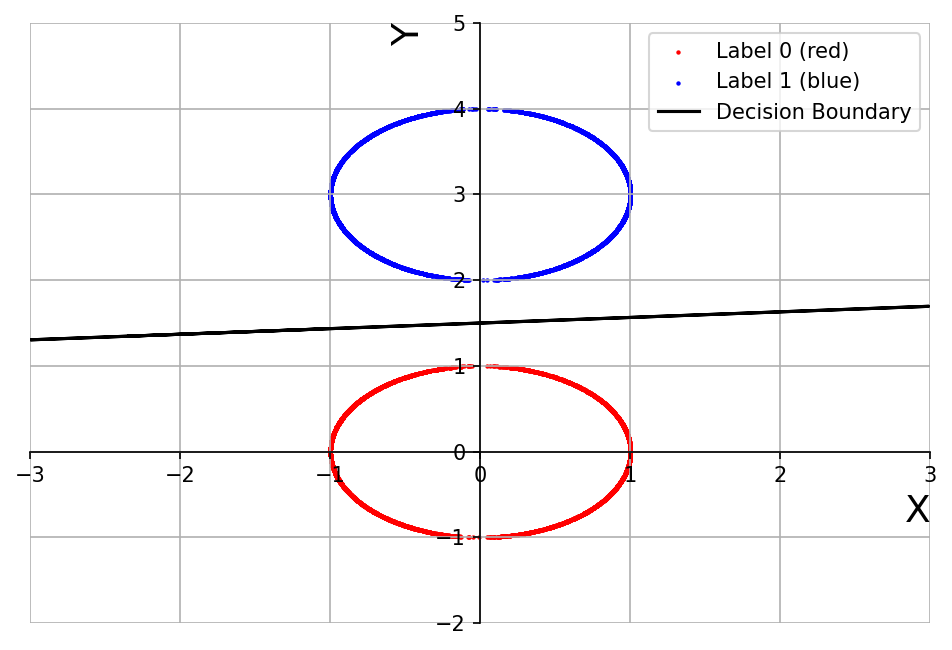

In [13]:
apply_preceptron_on_circle_data(df, partition_size=[80, 20])

#### Applying Perceptron on Datset with Noise and plotting Decision Boundary
with "add_noise = True"

We can see that, linear Decision boundary is able to perfectly classify the two circular regions in DATASET WITH NOISE. 

Since the random noise has standard deivation of 0.1 which is low, and still doesn't affects the linear separability of two circular regions.
 
Because even after adding the noise, the two circular regions are still linearly separable. So, the Perceptron Training algorithm will converge according to Perceptron Convergence theorem. So, we can easily find a linear Decision boundary that can separate two circular regions. 

Accuracy in Prediction of Perceptron Learning Algorithm (on 20% Testing Set): 1.0


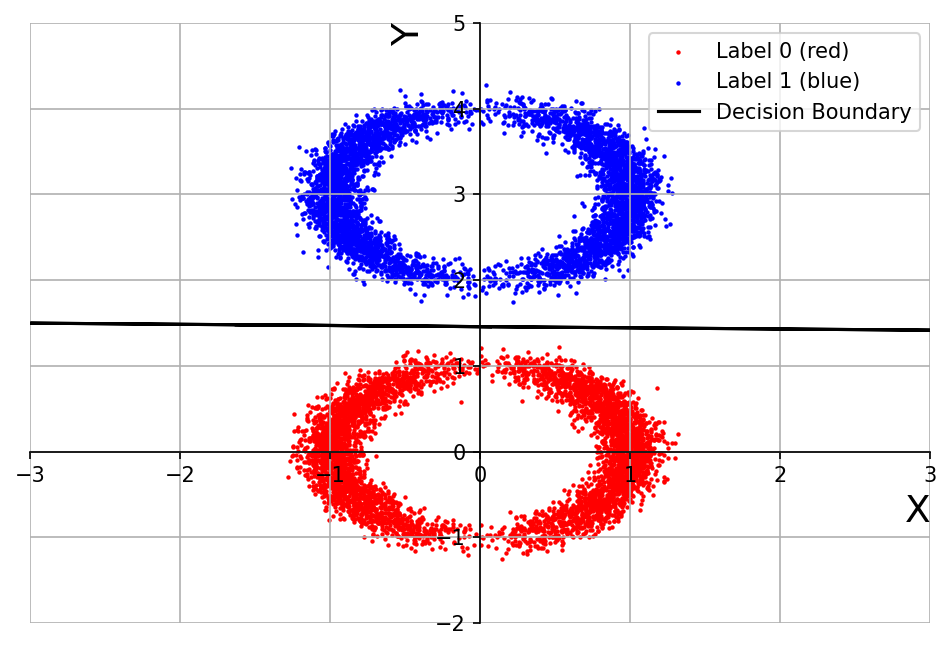

In [14]:
apply_preceptron_on_circle_data(df_noise, partition_size=[80, 20])

##### Decision Boundary exists in the case of Perceptron learning algorithm implemented, on both Dataset (with and without Noise Dataset)

# Q2 Part-4

Accuracy in Prediction of Perceptron Learning Algorithm (on 20% Testing Set): 0.7575


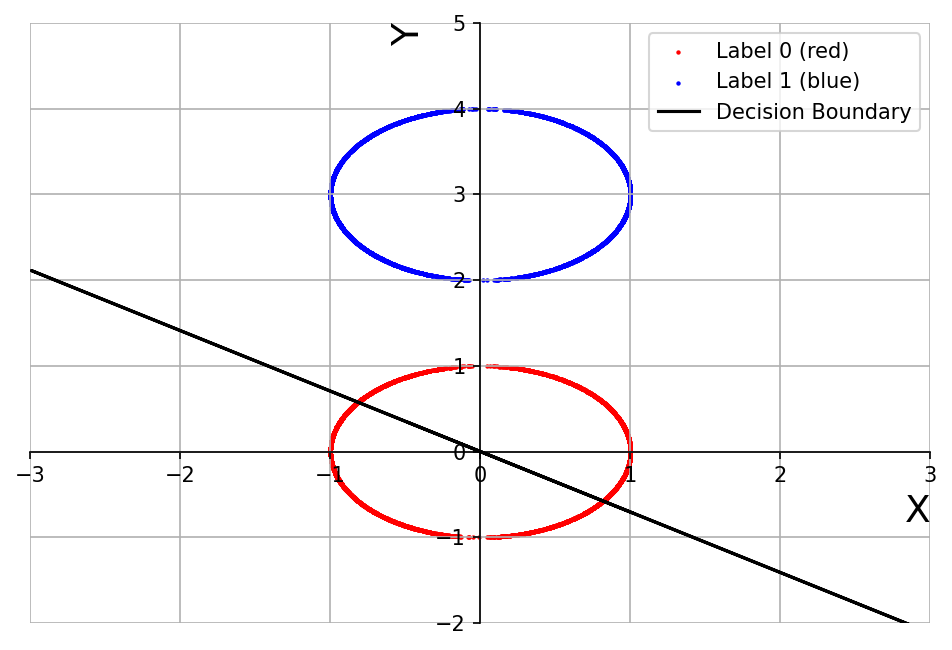

In [15]:
apply_preceptron_on_circle_data(df, with_bias=False, partition_size=[80, 20])

##### Explaination for why Decision Boundary doesn't exists in Circle dataset, when PTA is implemented without Bias.



We can clearly see that above Decision Boundary can not classify the two circular regions (in Circle Dataset without noise), when we set a fixed bias equal to "0".

This is beacuse the equation of our Decision boundary is "w0 + w1.x1 + w2.x2 + ... + wn.xn = 0".

In our case of Circle Dataset, we have only two features. 

So, the equation of Decision Boundary reduces to "w0 + w1.x1 + w2.x2 = 0".

As the Input Bias is fixed to zero '0', this implies "w0 = 0". 

So, the equation of Decision Boundary further reduces to "w1.x1 + w2.x2 = 0".

This Decision boundary can be represented in the form of "y = mx", once we know the values of models' weights by PTA. This is a equation of straight line passign through the origin.

So, when we apply apply PTA without Bias we get a Decision Boundary passing through the origin. 

This Decision Boundary will just rotate thorugh the origin, whenever the values of models' weight (w1 & w2) are changed in the Perceptron Training Algorithm. So, a Decision Boundary rotating through the origin can not separate the two circular regions, as shown in the above the Plot of Decision Boundary.

By look at the above Dataset of two circular regions, we see that it is not separable by a linear Decision Boundary (st. line) passing through the origin. So, no Decision boundary exits when we train a model using PTA with fixed bias '0'.

Since, Bias acts as the model parameter which can be tuned to make the models' performance on training data accurate. Running PTA on Data without Bias leads to poor performance of Perceptron model.

# Q2 Part-5

In [16]:
bit_df = pd.DataFrame(np.array([[0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1]], dtype=np.int64), columns=['A', 'B'])

#### AND Dataset

In [17]:
AND_df = bit_df.copy()
AND_df['AND'] = AND_df['A'] & AND_df['B']
AND_df

,A,B,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


#### OR Dataset

In [18]:
OR_df = bit_df.copy()
OR_df['OR'] = OR_df['A'] | OR_df['B']
OR_df

,A,B,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


#### XOR Dataset

In [19]:
XOR_df = bit_df.copy()
XOR_df['XOR'] = XOR_df['A'] ^ XOR_df['B']
XOR_df

,A,B,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


#### Plotting the AND, OR, XOR Dataset and their repective Decision Boundary

In [20]:
def plot_bit_dataset(data:pd.DataFrame, model_weights, with_bias):
    fig = plt.figure(dpi=100)
    axes = fig.add_axes([0,0,1,1])

    df_bit_output_0 = data[data[data.columns[-1]] == 0]
    df_bit_output_1 = data[data[data.columns[-1]] == 1]

    axes.scatter(df_bit_output_0['A'], df_bit_output_0['B'], c='r', marker='o', label=f"{data.columns[-1]} = 0", s=80);
    axes.scatter(df_bit_output_1['A'], df_bit_output_1['B'], c='b', marker='o', label=f"{data.columns[-1]} = 1", s=80);

    x = np.random.uniform(low=-1,high=3,size=100)
    y = -1
    y = (-model_weights[2] - model_weights[0]*x) / model_weights[1]
    axes.plot(x,y,color='k',label='Decision Boundary')
    
    axes.grid(True)
    axes.legend()
    axes.set_xlim([-0.5,3])
    axes.set_ylim([-1,3])
    axes.set_xticks(np.arange(0,4))
    axes.set_yticks(np.arange(-1,4))
    axes.set_xlabel('A', fontsize=18)
    axes.set_ylabel('B', fontsize=18)
    if not with_bias:
        axes.set_title("Plot of Decision Boundary in PTA (with fixed Bias = 0)")
    else:
        axes.set_title("Plot of Decision Boundary in PTA (with learnable Bias)")
    plt.show()

##### Function to apply PTA on AND, OR, XOR output Datasets

In [28]:
def apply_perceptron_on_bit_dataset(dataset, with_bias):
    x_train, y_train = split_bit_dataset(dataset, with_bias=with_bias)
    
    perceptron_model = Perceptron()
    perceptron_model.fit(x_train, y_train)
    print("Perceptron Model Weights",perceptron_model.weights)
    
    plot_bit_dataset(dataset, with_bias=with_bias, model_weights=perceptron_model.weights)

### Applying PTA on AND Dataset

We can see that, linear Decision boundary is able to perfectly classify the two classes (AND=0 and AND=1).

As the output labels (0 and 1) are linearly separable, so the Perceptron Training algorithm will converge according to Perceptron Convergence theorem. So, we can easily find a linear Decision boundary that can separate two output labels. 

Assumption: Any input lying on the Decision boundary will be considered to have a output label as "1".

Because we used similar condition in Signum activation function (x>=0 implies y=1)

Applying PCA on AND Dataset (with Learnable Bias):
Perceptron Model Weights [ 1.  1. -2.]


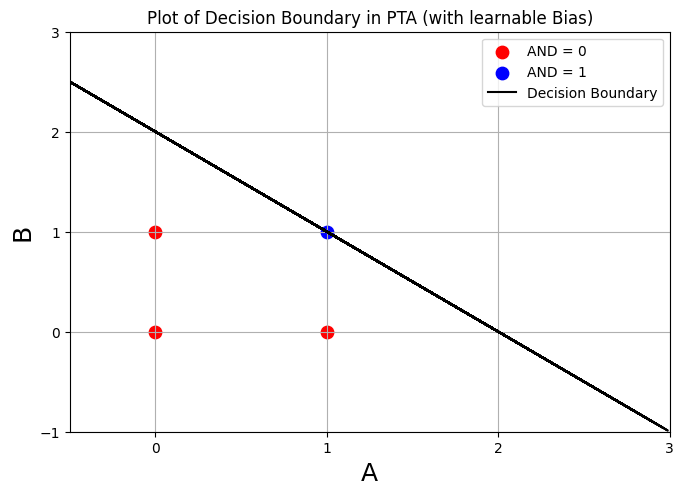

In [29]:
print("Applying PCA on AND Dataset (with Learnable Bias):")
apply_perceptron_on_bit_dataset(dataset=AND_df, with_bias=True)

We can see that, linear Decision boundary is not able to perfectly classify the two classes (AND=0 and AND=1), when PTA is implemented with a fixed bias of 0. Reason being the same for Part 2-d.

Applying PCA on AND Dataset (with Fixed Bias=0):
Perceptron Model Weights [1. 1. 0.]


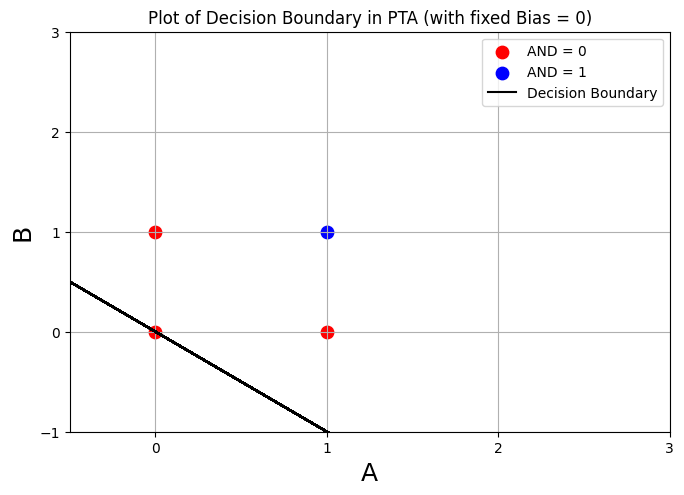

In [30]:
print("Applying PCA on AND Dataset (with Fixed Bias=0):")
apply_perceptron_on_bit_dataset(dataset=AND_df, with_bias=False)

### Applying PTA on OR Dataset

We can see that, linear Decision boundary is able to perfectly classify the two classes (OR=0 and OR=1).


As the output labels (0 and 1) are linearly separable, so the Perceptron Training algorithm will converge according to Perceptron Convergence theorem. So, we can easily find a linear Decision boundary that can separate two output labels.

Applying PCA on OR Dataset (with Learnable Bias):
Perceptron Model Weights [ 3.  3. -2.]


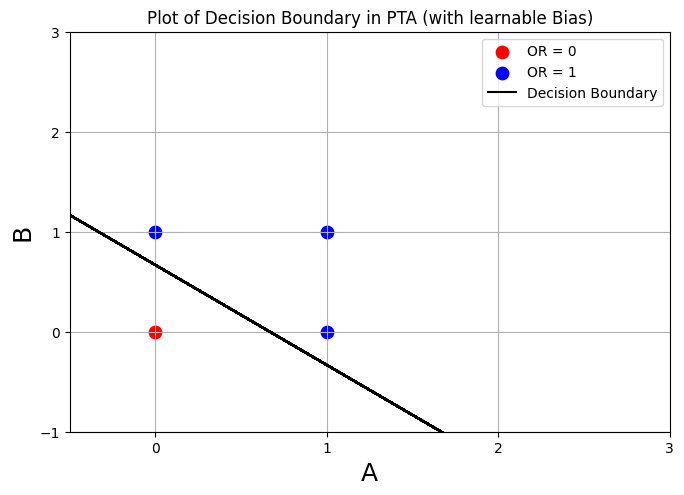

In [31]:
print("Applying PCA on OR Dataset (with Learnable Bias):")
apply_perceptron_on_bit_dataset(dataset=OR_df, with_bias=True)

We can see that, linear Decision boundary is able to perfectly classify the two classes (OR=0 and OR=1) in case of PTA with fixed Bias of 0. 

We can find a Decision boundary that passes through origin & classfies two classes.

Applying PCA on OR Dataset (with Fixed Bias=0):
Perceptron Model Weights [1. 1. 0.]


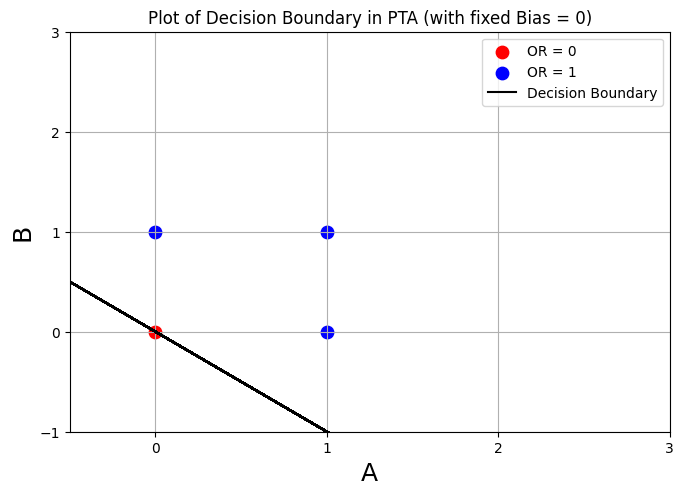

In [32]:
print("Applying PCA on OR Dataset (with Fixed Bias=0):")
apply_perceptron_on_bit_dataset(dataset=OR_df, with_bias=False)

### Applying PTA on XOR Dataset

We can see that, linear Decision boundary can not perfectly classify the two classes (XOR=0 and XOR=1).

Applying PCA on XOR Dataset (with Learnable Bias):


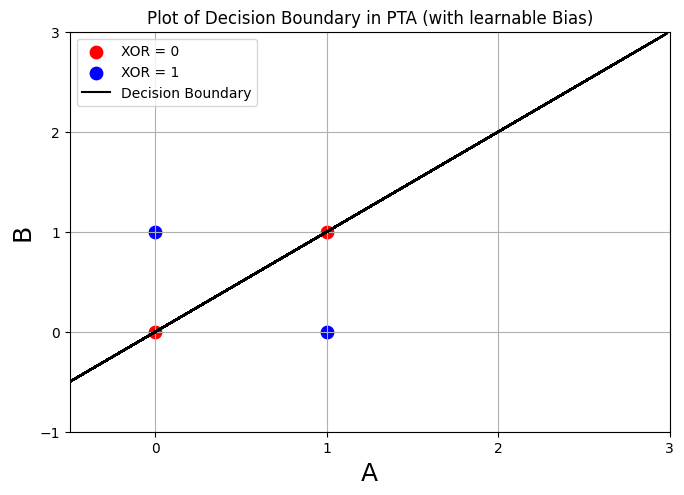

In [26]:
print("Applying PCA on XOR Dataset (with Learnable Bias):")
apply_perceptron_on_bit_dataset(dataset=XOR_df, with_bias=True)

Applying PCA on XOR Dataset (with Fixed Bias=0):


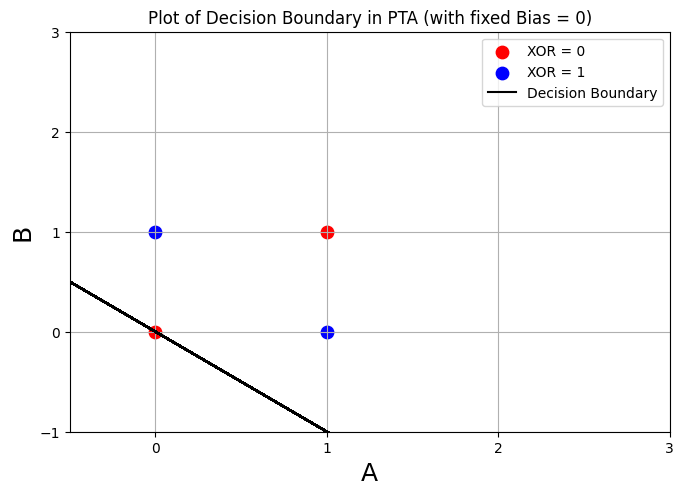

In [27]:
print("Applying PCA on XOR Dataset (with Fixed Bias=0):")
apply_perceptron_on_bit_dataset(dataset=XOR_df, with_bias=False)

##### Explaination for why Decision Boundary doesn't exists in XOR dataset & PTA is not applicable in XOR data!

We know that, Perceptron Learning Algorithm makes a stronger assumption about the separablility of data by a hyperplane (linear deicision boundary).

By Perceptron Convergence Theorem, if the dataset is linearly separable then PTA is guaranteed to converge. But the XOR Dataset is not linearly separable by a hyperplane (Decision boundary), hence the PTA will never converge. Due to we can't use PTA here and find the values of Perceptron model's weights and bias. Hence, no Decision Boundary.

By a look at the AND and OR Dataset, we can see that a linear Hyperplane (Decision boundary) can separate the two output labels (0 and 1), hence the PTA will definitely converge. So, PTA can be applied in AND and OR data, and we can find the values of Perceptron model's weights and bias. Hence, Decision Boundary can be found easily.

As in XOR dataset, there is no separability between two output labels (0 and 1) by a hyperplane. So, PTA can't be used on such a XOR dataset. Hence, no hyperplane will exist that can separate two output labels (0 and 1) (as also clearly visible in above Plot). Hence, no Decision boundary will exits for above XOR Dataset.

From the above plot of XOR Dataset, we can see the linear Decision boundary fails to perfectly classifying the two labels (two output labels (0 and 1)), indicating Decision Boundary can't exist.

# Q2 Part-6

If we have a Hyperplane equation and a Test sample data point. So, to compute the class (0 or 1) it belongs to:

We do the following:

1) Plug the values of Data points (x1, x2, ..., xn) in Hyperplane equation (w0 + w1.x1 + w2.x2 + ... + wn.xn) to get a real number h(x).
    
    h(x)  =  w0 + w1.x1 + w2.x2 + ... + wn.xn
    
2) If this real number h(x) = (w0 + w1.x1 + w2.x2 + ... + wn.xn) is greater than or equal to 0 (>=0), then the class of this data point is "1" or "positive class". As, after signum activation function, the values of h(x) will be mapped to "1".

3) If this real number h(x) = (w0 + w1.x1 + w2.x2 + ... + wn.xn) is less than 0 (<0), then the class of this data point is "0" or "negative class". As, after signum activation function, the values of h(x) will be mapped to "-1" denoting "negative class or 0".

4)      If h(x) >= 0:

            signum(h(x)) = 1       -----> "+ve class" or "1"

        If h(x) < 0:

            signum(h(x)) = -1      -----> "-ve class" or "0"

Assumptions:

If the data point lies on the Decision boundary (or Hyperline), i.e, it satisfies h(x) = 0.

Then the class of this data point is considered to be "+ve class" or "1".